### Exercise 5.11: Given x and y, create the following plots in the same figure 

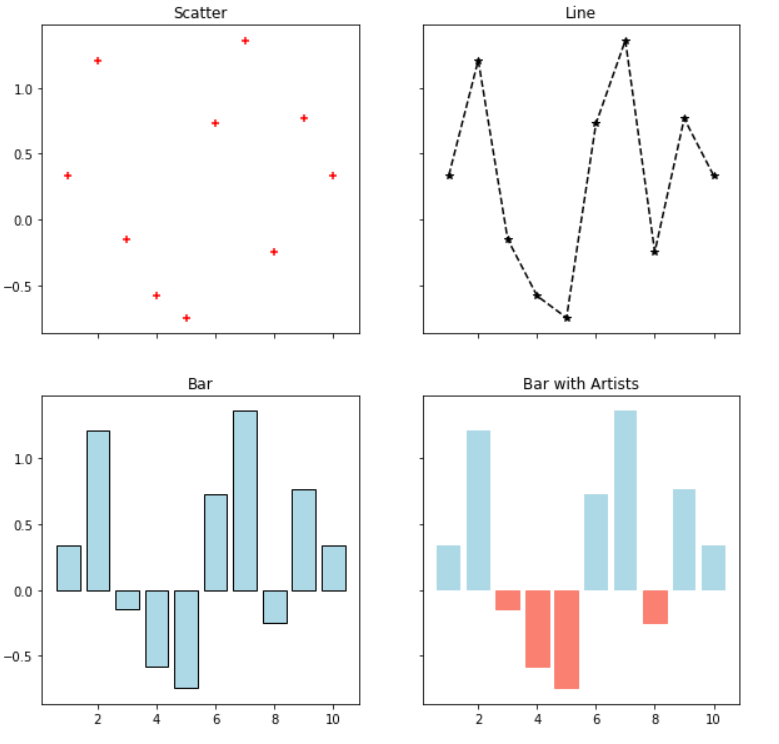

In [1]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0.33502594,  1.20887595, -0.14992567, -0.57958978, -0.74527937, 0.72734383,  1.35903977, -0.24595918,  0.76536885,  0.33394717]

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
colors = []
for i in y:
    if i >= 0:
        colors.append('cyan')
    else:
        colors.append('orange')  

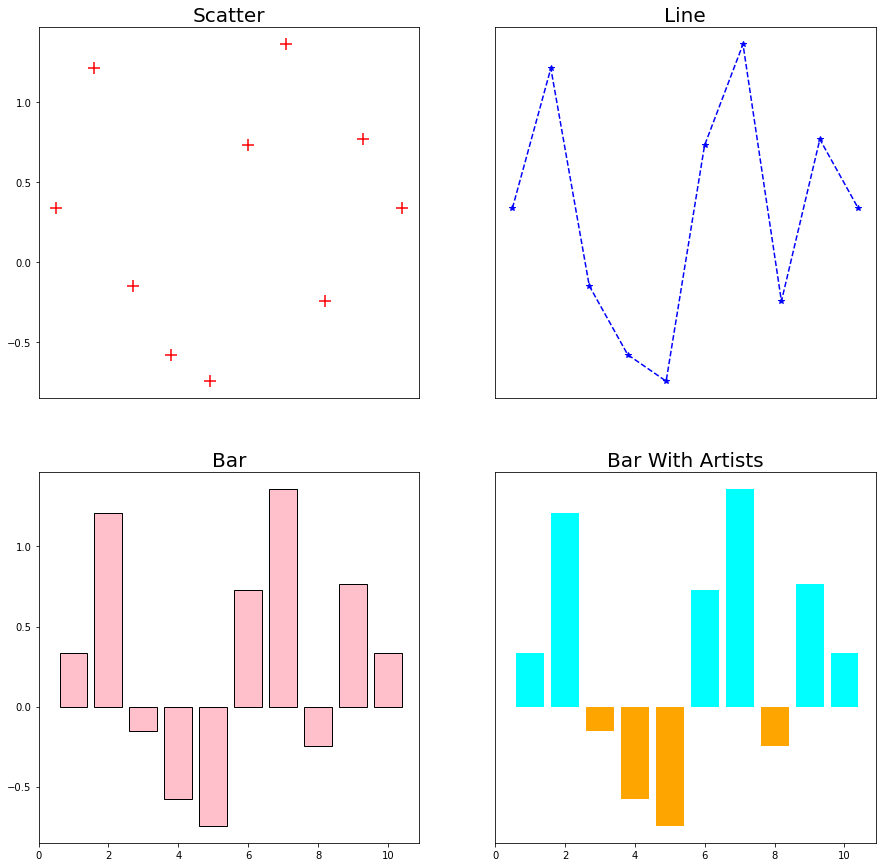

In [4]:
fig, axis = plt.subplots(2, 2) 
fig.set_figheight(15)
fig.set_figwidth(15)

axis[0, 0].scatter(x , y , marker = '+' , s =150 , color ='red')
axis[0, 0].set_title("Scatter" , fontsize = 20)
axis[0, 0].set_yticks(np.arange(-0.5, 1.5, 0.5))
axis[0, 0].set_xticks([])

axis[0, 1].plot(x , y , 'b*--')
axis[0, 1].set_title("Line" , fontsize = 20)
axis[0, 1].set_xticks([])
axis[0, 1].set_yticks([])

axis[1, 0].bar(x , y , color = 'pink' , edgecolor = "black" )
axis[1, 0].set_title("Bar" , fontsize = 20)
axis[1, 0].set_yticks(np.arange(-0.5, 1.5, 0.5))
axis[1, 0].set_xticks(np.arange(0, 12, 2))

axis[1, 1].bar(x , y, color = colors  )
axis[1, 1].set_title("Bar With Artists" , fontsize = 20)
axis[1, 1].set_yticks([])
axis[1, 1].set_xticks(np.arange(0, 12, 2))


plt.show()

### Exercise 5.12: Given data, create the following plots in the same axes

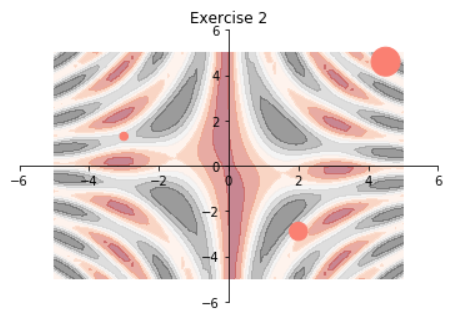

In [3]:
def f(x, y):
    return np.sin(x) ** 2 + np.cos(10 + y * x)
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x_contour, y_contour = np.meshgrid(x, y) #create positions
z_contour = f(x_contour, y_contour)
x_scatter = [2, -3, 4.5]
y_scatter = [-2.9, 1.3, 4.6]

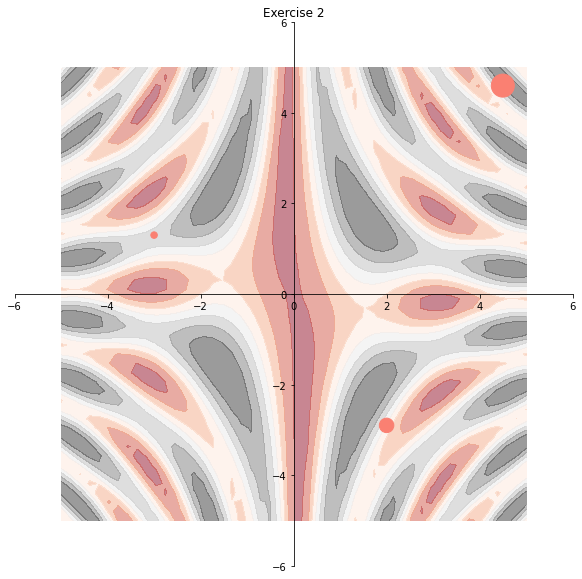

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.contourf(x, y, z_contour , cmap = 'RdGy' , alpha = 0.5)
area = (5 * np.array(y_scatter))**2
ax.scatter(x_scatter , y_scatter, color = 'salmon' , s = area)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data' , 0))
ax.spines['left'].set_position(('data' , 0))

ax.set(title = 'Exercise 2', xlim = [-6,6] , ylim = [-6,6] )

plt.show()


### Exercise 5.13: Penguins dataset exploration

In [29]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [30]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

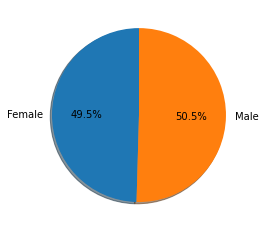

In [99]:
a = penguins.groupby(by='sex').size()

a1 = pd.DataFrame(a)
genders = a1.reset_index()
genders.columns.values[1] = 'Population'


sex = genders['sex'].tolist()
population = genders['Population'].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(population, labels= sex , autopct='%1.1f%%',shadow=True, startangle=90)


plt.show()


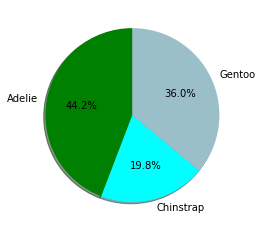

In [109]:
b = penguins.groupby(by='species').size()

a2 = pd.DataFrame(b)
species = a2.reset_index()

species.columns.values[1] = 'Number'

sub_species= species['species'].tolist()

number = species['Number'].tolist()

colors = ['green' , 'cyan' , '#9bbfc9']

fig2, ax2 = plt.subplots()
ax2.pie( number , labels = sub_species,  autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)

plt.show()

In [131]:
#countif on multiple columns, use groupby)

cols = ['species','sex']
c = pd.DataFrame(penguins, columns = cols)
print(c)
df3 = c.groupby(['species', 'sex'])[['sex']].count()

df3.rename(columns = {'sex':'Number'}, inplace = True)
print(df3)

    species     sex
0    Adelie    Male
1    Adelie  Female
2    Adelie  Female
3    Adelie     NaN
4    Adelie  Female
..      ...     ...
339  Gentoo     NaN
340  Gentoo  Female
341  Gentoo    Male
342  Gentoo  Female
343  Gentoo    Male

[344 rows x 2 columns]
                  Number
species   sex           
Adelie    Female      73
          Male        73
Chinstrap Female      34
          Male        34
Gentoo    Female      58
          Male        61
